## Problem 2: Visualize an interactive map

In [1]:
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading in the population data file
pop = gpd.read_file('data/Vaestoruudukko_2017.shp')

# selecting the population density and geometry columns
pop = pop[['ASVALJYYS', 'geometry']]

# reprojecting the data
pop = pop.to_crs(epsg=4326)

# adding a geoid column for folium and reordering the columns
pop['geoid'] = pop.index.astype(str)
pop = pop[['geoid', 'ASVALJYYS', 'geometry']]

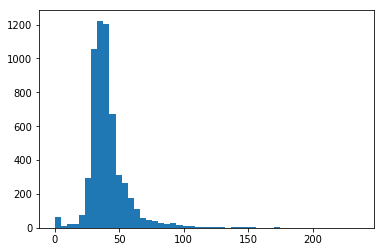

In [3]:
plt.hist(pop['ASVALJYYS'], bins=50);

In the histogram it can be seen that there are a few grid cells with population densities over 100%. Including these values in the map makes the legend practically unreadable. Therefore I decided to exclude them in my map.

In [4]:
# creating a subset of the pop geodataframe where population density is less than or equal to 100%
pop_sub = pop.loc[pop['ASVALJYYS'] <= 100]

# saving the geodataframe as a json
pop_sub_json = pop_sub.to_json()

In [6]:
# calculating the quantiles of the pop_sub dataframe
quantiles = pop_sub['ASVALJYYS'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1])

print('quantiles:\n')
print(quantiles)

quantiles:

0.0     0.0
0.2    32.0
0.4    36.0
0.6    40.0
0.8    47.0
1.0    99.0
Name: ASVALJYYS, dtype: float64


In [7]:
# creating a folium map with initial focus on helsinki
m = folium.Map(location=[60.25, 24.8], zoom_start=10, control_scale=True)

# adding a choropleth layer of population density in helsinki
m.choropleth(
    geo_data=pop_sub_json,
    data=pop_sub,
    columns=['geoid', 'ASVALJYYS'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_weight=0,
    threshold_scale=quantiles.values,
    legend_name= 'Population Density in Helsinki 2017')

m.save('docs/population_density.html')